<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab01_toolset.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab 1 -- Toolset

* Numpy -- [numpy.org](www.numpy.org)
    * Convenient array manipulation, linear algebra (like Matlab)
* Matplotlib
    * 2D plotting
    * [Seaborn](https://seaborn.pydata.org/) has some nice statistical extensions
* Pandas
    * High level data manipulation tools built on top of NumPy.
    * Convenient reading, writing, manipulating and plotting DataFrames
* scikit-learn
    * Machine learning built on top of numpy, matplotlib, scipy (including pandas)
* Tensorflow & Keras
* Python

### References

* [UCI data archive](https://archive.ics.uci.edu/ml/datasets/iris) --- uci.edu
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) (2016) by VanderPlas
    * [04.02 simple scatterplots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)
* Tensorflow & Keras -- [tensorflow.org](www.tensorflow.org)

# Fisher's Iris dataset

* This is a classic dataset for ML classification.
* [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) --  wikipedia.org

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch01/images/01_08.png" width="600"/>

In [13]:
# Imports for loading and plotting the Iris dataset
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [14]:
# Load the Iris dataset
iris = load_iris()

In [15]:
# Extract the feature data
data = iris.data

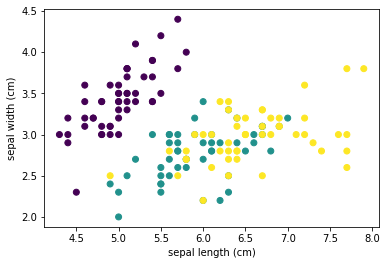

In [ ]:
# Plot the Iris dataset
scatter = plt.scatter(data[:, 0], data[:, 1], 
            # alpha=0.2, s=100*data[:, 3], 
            c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0]) 
plt.ylabel(iris.feature_names[1]);


# Supervised learning -- classification

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch01/images/01_03.png" width="400"/>

* Mathematically, this binary classification model can be written
\begin{align*}
  y =  \left\lbrace
  \begin{array}{r@{}l}
    \mathrm{yes}, & z \geq 0 \\
    \mathrm{no}, & z < 0
  \end{array}
  \right.
\end{align*}
where
$$
z = w_0 + w_1 x_1 + w_2 x_2
$$
* The class $y$ can take on a finite set of qualitative values.
* The dependent variable $z$ is a function of $x_1$ and $x_2$.
* The independent variables $x_1$ and $x_2$ are called "features".
* $w_0$, $w_1$, and $w_2$ are "trainable" parameters
    * $w_1$ and $w_2$ are called weights. 
    * $w_0$ is called a bias term.
* The dashed line corresponds to the equation $z = 0$.
* Trainable parameters are "learned" from data or observations.
    * Training data have known values of $y$ and $x_i$



# Random number generation


In [29]:
import numpy as np

rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [37]:
# 2-D random number generation (multivariate Gaussian)
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

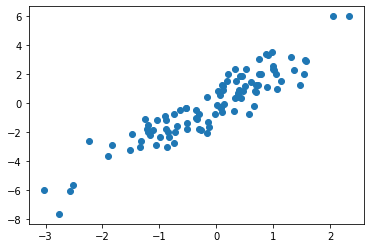

In [ ]:
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

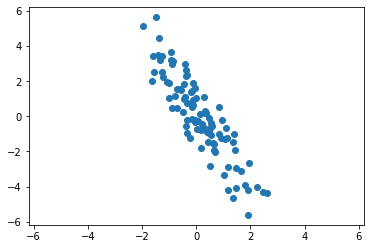

In [ ]:
min_val = 1.1 * np.min(X)
max_val = 1.1 * np.max(X)

axes = plt.gca()
axes.set_xlim([min_val, max_val])
axes.set_ylim([min_val, max_val])
plt.scatter(X[:, 0], X[:, 1]);

In [51]:
# Sample covariance for 2-D multivariate Gaussian
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
n = 10
X = rand.multivariate_normal(mean, cov, n)
np.dot(X.T, X) / n 

array([[1.01840378, 2.42513507],
       [2.42513507, 7.47657115]])

# Perceptron

* Refer to cells 3-6 in [ch02.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb) -- github

* The formal definition of an artificial neuron involves a decision function $\phi(z)$.
* For the Perceptron, $\phi(z)$ is the unit step function
\begin{align*}
  \phi(z) =  \left\lbrace
  \begin{array}{r@{}l}
    \mathrm{1}, & z \geq 0 \\
    \mathrm{-1}, & z < 0
  \end{array}
  \right.
\end{align*}
where
$$
z = w_0 + w_1 x_1 + w_2 x_2
$$
* The line $z=0$ is called the decision boundary. 
* With more than 2 features, the decision boundary is a hyperplane.

# Perceptron learning -- vectorized

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_04.png" width="600"/>

The learning rule is
$$
w_\mathrm{new} = w_\mathrm{old} + \eta \ (y_{true} - \phi(z))
$$



In [24]:
# Let's see how to vectorize the learning rule with numpy
X = data[:, [0, 1]]
w = np.array([0,1,-2])

assert X.shape == (150, 2)
assert w.shape == (3,)

z = np.dot(X, w[1:]) + w[0]
z

array([-1.9, -1.1, -1.7, -1.6, -2.2, -2.4, -2.2, -1.8, -1.4, -1.3, -2. ,
       -2. , -1.2, -1.7, -2.2, -3.1, -2.4, -1.9, -1.9, -2.5, -1.4, -2.3,
       -2.6, -1.5, -2. , -1. , -1.8, -1.8, -1.6, -1.7, -1.4, -1.4, -3. ,
       -2.9, -1.3, -1.4, -1.5, -2.3, -1.6, -1.7, -2. , -0.1, -2. , -2. ,
       -2.5, -1.2, -2.5, -1.8, -2.1, -1.6,  0.6,  0. ,  0.7,  0.9,  0.9,
        0.1, -0.3,  0.1,  0.8, -0.2,  1. , -0.1,  1.6,  0.3, -0.2,  0.5,
       -0.4,  0.4,  1.8,  0.6, -0.5,  0.5,  1.3,  0.5,  0.6,  0.6,  1.2,
        0.7,  0.2,  0.5,  0.7,  0.7,  0.4,  0.6, -0.6, -0.8,  0.5,  1.7,
       -0.4,  0.5,  0.3,  0.1,  0.6,  0.4,  0.2, -0.3, -0.1,  0.4,  0.1,
        0.1, -0.3,  0.4,  1.1,  0.5,  0.5,  1.6, -0.1,  1.5,  1.7,  0. ,
        0.1,  1. ,  0.8,  0.7,  0.2,  0. ,  0.5,  0.1,  2.5,  1.6,  0.5,
        0. ,  2.1,  0.9,  0.1,  0.8,  0.6,  0.1,  0.8,  1.2,  1.8,  0.3,
        0.8,  0.7,  0.9,  1.7, -0.5,  0.2,  0. ,  0.7,  0.5,  0.7,  0.4,
        0.4,  0.1,  0.7,  1.3,  0.5, -0.6, -0.1])

# Tensorflow



<img src="https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph-2.png" width="800"/>

### Reference

* [Part1_TensorFlow.ipynb](https://github.com/aamini/introtodeeplearning/blob/master/lab1/Part1_TensorFlow.ipynb)
* Image Copyright 2020 MIT 6.S191 Introduction to Deep Learning.

# OOP

Introduction to Object-Oriented Programming with Python



In [57]:
# A python function
def my_function(a,b):
  return a + b

my_function(1,2)

3

In [74]:
# A python class
class MyClass():
  """A simple class"""
  def __init__(self):
    self.a = 0
    pass

  def my_method(self):
    """A simple method in a simple class"""
    self.a += 1
    print('Hello from my_method', self.a)

myclass = MyClass()

myclass.my_method()

Hello from my_method 1
